# Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
logins = pd.read_json('logins.json')

In [3]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
logins.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


Logins start from January 1 1970 and continue until April 13 1970.  In order to do a time series we need to set login-time as the index since it is already a datetime datatype.

In [7]:
logins = logins.set_index(['login_time'])
logins.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


Next resample the logon counts based on 15 minute intervals

In [8]:
logins['count'] = 1
logins = logins.resample('15T').sum()
logins.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


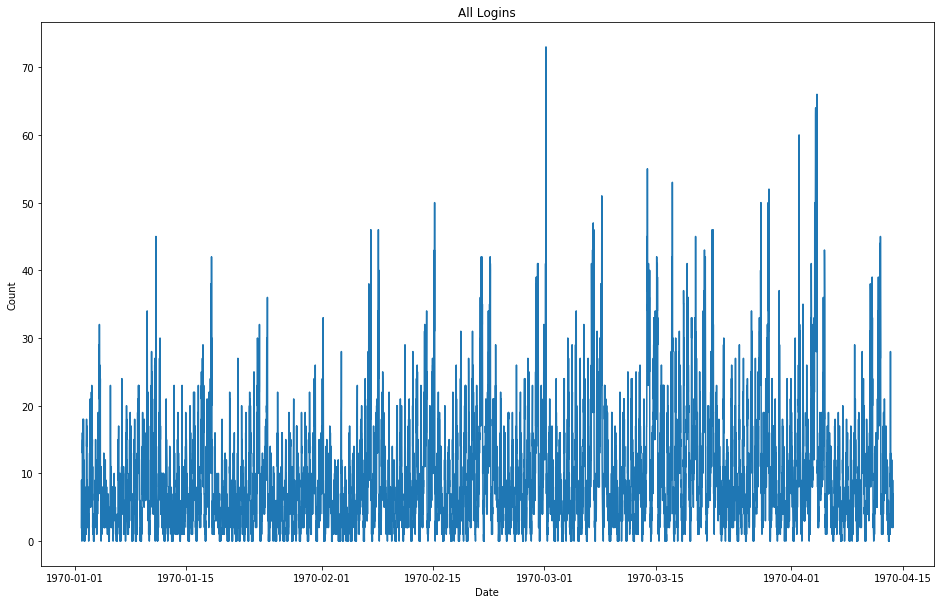

In [9]:
plt.figure(figsize=(16, 10))
plt.plot(logins)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('All Logins')
plt.show()

Even with a relatively short period of time (3.5 months) the data is hard to interpret with it being so close together.  Splitting our data into separate months could possibly help.

In [10]:
#Create separate January, February, March, April dataframes
jan = logins.loc['1970-01-01': '1970-01-31']
feb = logins.loc['1970-02-01': '1970-02-28']
march = logins.loc['1970-03-01': '1970-03-31']
april = logins.loc['1970-04-01': '1970-04-30']

In [11]:
jan.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [12]:
feb.head()

,count
login_time,
1970-02-01 00:00:00,12
1970-02-01 00:15:00,11
1970-02-01 00:30:00,17
1970-02-01 00:45:00,15
1970-02-01 01:00:00,16


In [13]:
march.head()

,count
login_time,
1970-03-01 00:00:00,16
1970-03-01 00:15:00,19
1970-03-01 00:30:00,17
1970-03-01 00:45:00,12
1970-03-01 01:00:00,20


In [14]:
april.head()

,count
login_time,
1970-04-01 00:00:00,15
1970-04-01 00:15:00,11
1970-04-01 00:30:00,14
1970-04-01 00:45:00,19
1970-04-01 01:00:00,16


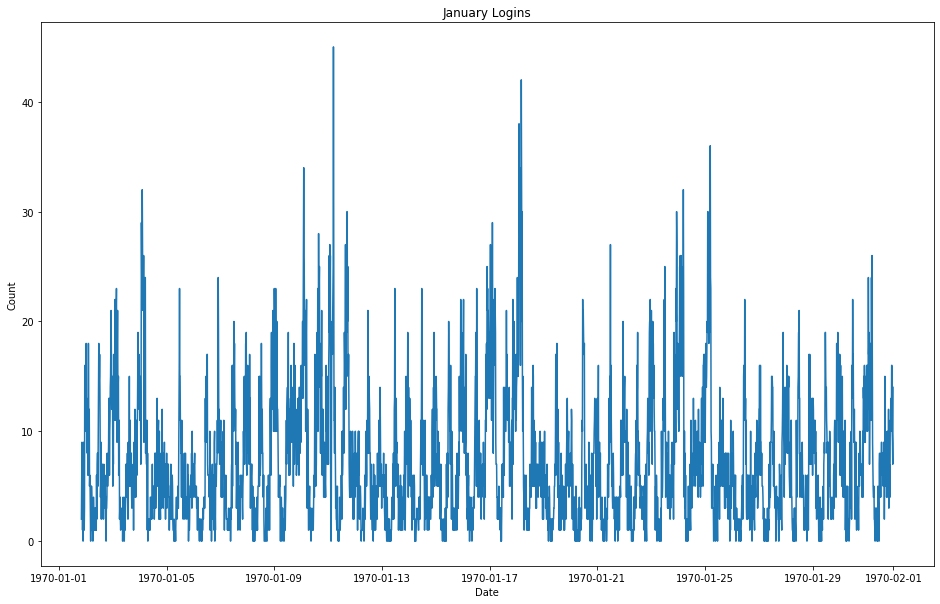

In [15]:
plt.figure(figsize=(16, 10))
plt.plot(jan)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('January Logins')
plt.show()

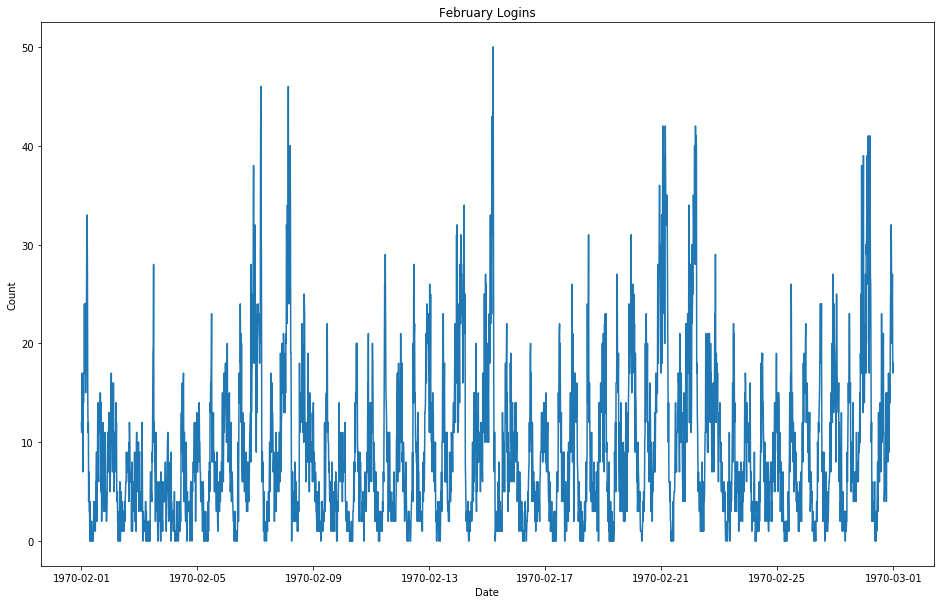

In [16]:
plt.figure(figsize=(16, 10))
plt.plot(feb)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('February Logins')
plt.show()

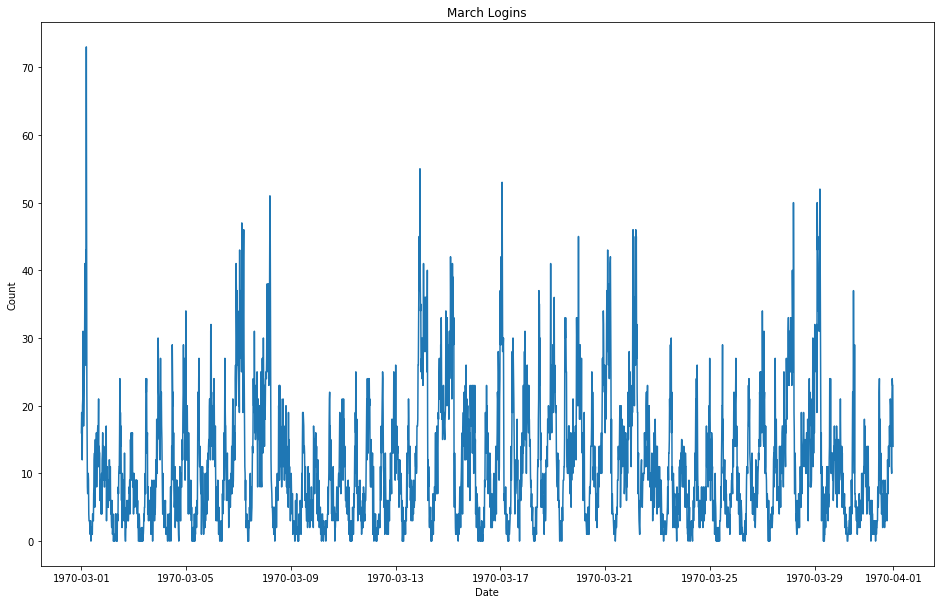

In [17]:
plt.figure(figsize=(16, 10))
plt.plot(march)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('March Logins')
plt.show()

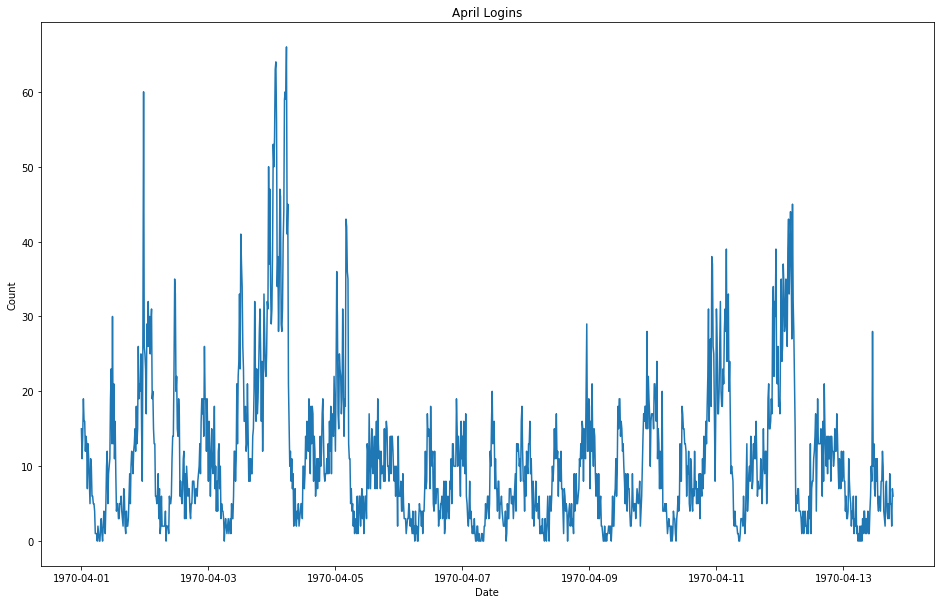

In [18]:
plt.figure(figsize=(16, 10))
plt.plot(april)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('April Logins')
plt.show()

What we see now is that there seems to be a pattern that emerges roughly on a weekly basis.  Since there are no monthly trends we need to compare the days of the week for our data.

In [19]:
logins['day_of_week'] = logins.index.day_name()
logins.head()

,count,day_of_week
login_time,,
1970-01-01 20:00:00,2,Thursday
1970-01-01 20:15:00,6,Thursday
1970-01-01 20:30:00,9,Thursday
1970-01-01 20:45:00,7,Thursday
1970-01-01 21:00:00,1,Thursday


In [20]:
weekdays = logins.groupby('day_of_week')['count'].sum().reset_index()
weekdays

,day_of_week,count
0,Friday,15208
1,Monday,8823
2,Saturday,19377
3,Sunday,18167
4,Thursday,11960
5,Tuesday,9268
6,Wednesday,10339


In [21]:
daylist = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_index = dict(zip(daylist,range(len(daylist))))
day_index

{'Sunday': 0,
 'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6}

In [22]:
weekdays['day_id'] = weekdays['day_of_week'].map(day_index)
weekdays.sort_values('day_id', inplace=True)
weekdays

,day_of_week,count,day_id
3,Sunday,18167,0
1,Monday,8823,1
5,Tuesday,9268,2
6,Wednesday,10339,3
4,Thursday,11960,4
0,Friday,15208,5
2,Saturday,19377,6


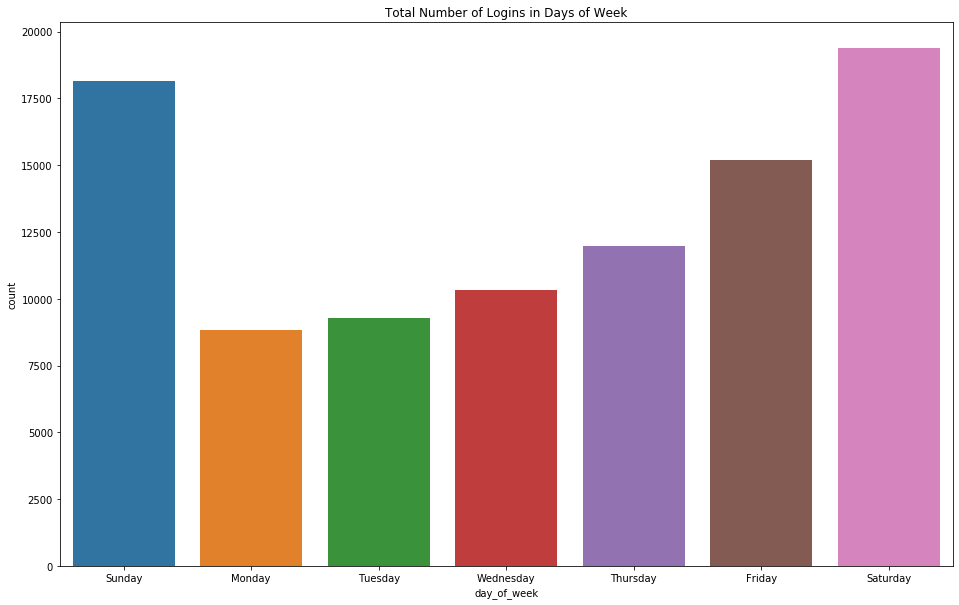

In [23]:
plt.figure(figsize=(16,10))
plt.title('Total Number of Logins in Days of Week')
sns.barplot(data = weekdays,x='day_of_week',y = 'count')
plt.show()

We see that Saturday and Sunday are the highest usage days as well as our lowest numbers being in the beginning of the week days.  There is a trend that is continually increasing starting in Monday and continuing until Saturday and slight fall in Sunday before it starts over again.

In [24]:
daily = pd.read_json('logins.json')
daily['hour'] = daily.login_time.dt.hour
daily['count'] = 1
daily = daily.groupby('hour')['count'].sum().reset_index()
daily.head()

,hour,count
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034


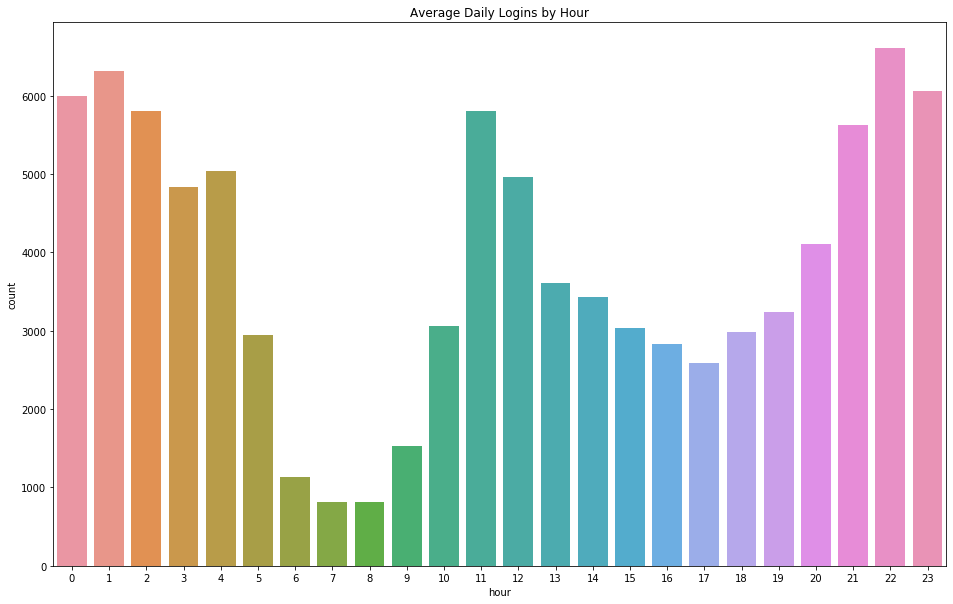

In [25]:
plt.figure(figsize=(16,10))
plt.title('Average Daily Logins by Hour')
sns.barplot(data = daily,x ='hour',y = 'count')
plt.show()

We have two peaks of 11 AM -12 PM and 9 PM - 2 AM which means that there seems to little usage during work hours and sleeping hours.

# Experiment and Metrics Design

# Solution
1.)  In order to get drivers who focus mainly in one city to become available in the other city by removing toll cost would be the percentage of time or passengers recieved in either city.  The trend before when the toll was active was that is was a high percentage for one city and a low percentage for the other.  In order to determine if removing the toll had any effect we want these percentage to be as close to 50% as possible.
2.)  A practical experiment that could be conducted would involve recording data before the tolls were removed and after at a time of length that are equal to each other.  This would be an A/B test where we would be testing whether the toll being removed had any statistical effect on being able to change the ratio closer to 50% in each city.  Comparing before and after, we would use a t-test to check for significance between the two groups.  We will be checking for the amount of passengers picked up and amount paid to the drivers before and after to see if having drivers available in both cities would actually bring in more money or if the previous model was more financially viable.

# Predictive Modeling

In [26]:
ultimate = pd.read_json('ultimate_data_challenge.json')

In [27]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [28]:
ultimate.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [29]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [30]:
#Change to Category
ultimate.city = ultimate.city.astype("category")
ultimate.phone = ultimate.phone.astype("category")
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   city                    50000 non-null  category
 1   trips_in_first_30_days  50000 non-null  int64   
 2   signup_date             50000 non-null  object  
 3   avg_rating_of_driver    41878 non-null  float64 
 4   avg_surge               50000 non-null  float64 
 5   last_trip_date          50000 non-null  object  
 6   phone                   49604 non-null  category
 7   surge_pct               50000 non-null  float64 
 8   ultimate_black_user     50000 non-null  bool    
 9   weekday_pct             50000 non-null  float64 
 10  avg_dist                50000 non-null  float64 
 11  avg_rating_by_driver    49799 non-null  float64 
dtypes: bool(1), category(2), float64(6), int64(1), object(2)
memory usage: 3.6+ MB


In [31]:
# Convert to datetime datatype
ultimate['last_trip_date'] = pd.to_datetime(ultimate['last_trip_date'])
ultimate['signup_date'] = pd.to_datetime(ultimate['signup_date'])

In [32]:
# Fill missing values with the average of the column value
ultimate['avg_rating_by_driver'].fillna(ultimate['avg_rating_by_driver'].mean(), inplace=True)
ultimate['avg_rating_of_driver'].fillna(ultimate['avg_rating_of_driver'].mean(), inplace=True)

In [33]:
# Phone is a category so we will fill in missing values with most common value
ultimate.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [34]:
ultimate['phone'].fillna('iPhone', inplace=True)

In [35]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  category      
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  category      
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), category(2), datetime64[ns](2), fl

Next we need to find which users were active which means they took a trip in the preceeding 30 days

In [36]:
ultimate.last_trip_date.max()

Timestamp('2014-07-01 00:00:00')

Active users are now defined as anyone who took a trip between 2014-06-01 00:00:00 and 2014-07-01 00:00:00

In [37]:
ultimate['active_users'] = (ultimate.last_trip_date >= '2014-06-01').astype(int)

In [38]:
ultimate.active_users.value_counts()

0    31196
1    18804
Name: active_users, dtype: int64

In [39]:
#Percentage of Active Users
percent = ultimate['active_users'].sum()/len(ultimate)*100
percent = str(round(percent, 2))
print(percent)

37.61


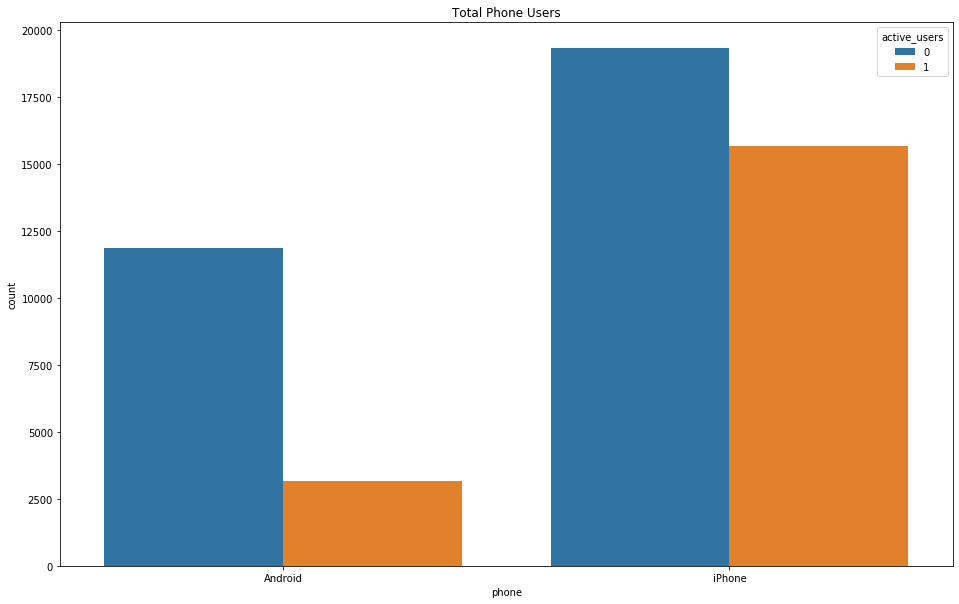

In [40]:
plt.figure(figsize=(16, 10))
sns.countplot(x = 'phone', hue = 'active_users', data = ultimate)
plt.title('Total Phone Users')
plt.show()

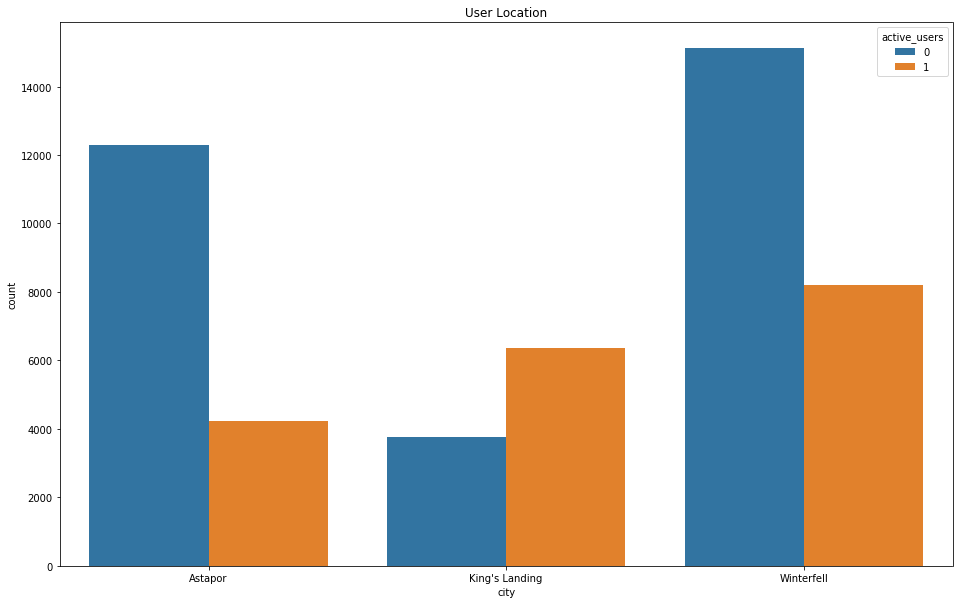

In [41]:
plt.figure(figsize=(16, 10))
sns.countplot(x = 'city', hue = 'active_users', data = ultimate)
plt.title('User Location')
plt.show()

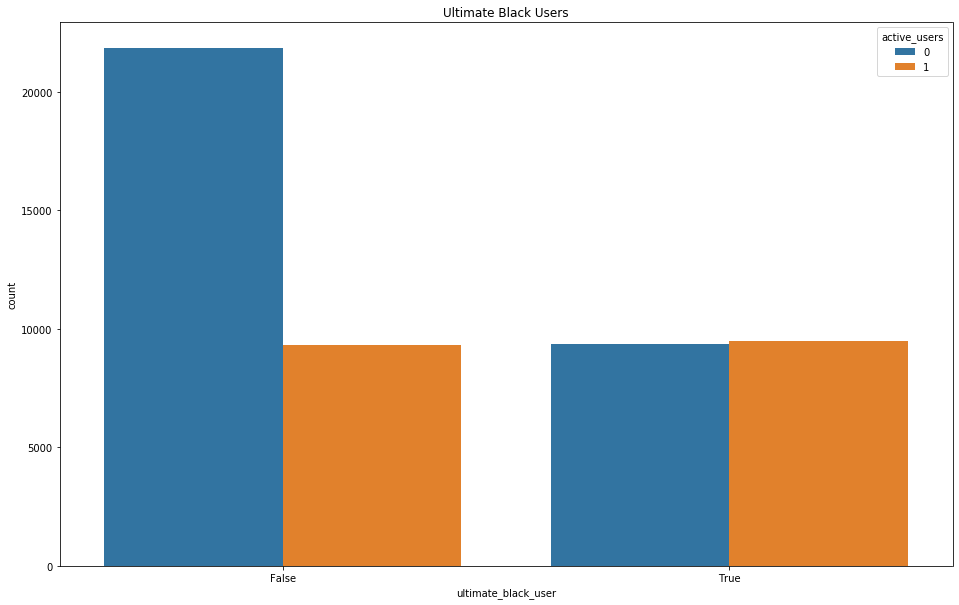

In [42]:
plt.figure(figsize=(16, 10))
sns.countplot(x = 'ultimate_black_user', hue = 'active_users', data = ultimate)
plt.title('Ultimate Black Users')
plt.show()

We can see that for active users they are more likely to be iPhone users over Android, be located in Winterfell over Kings Landing or Astapor, and be an ultimate black user than not being one.

Next we will be building a predictive model to help Ultimate determine whether or not a user will be active

In [43]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_users
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [44]:
#Drop data we don't need
ultimate.drop(['signup_date'], axis=1, inplace=True)
ultimate.drop(['last_trip_date'], axis=1, inplace=True)

#Create new columns for our categories for model calculation
ultimate = pd.get_dummies(ultimate, columns = ['city', 'phone', 'ultimate_black_user'])
ultimate.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active_users,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,0,1,1,0,1,0


In [45]:
# Use active_users for cross validation  
x = ultimate.drop('active_users', axis=1)
y = ultimate.active_users

# Splitting train and test sets
X_train, y_train, X_test, y_test = train_test_split(x, y, test_size=0.33, random_state=22)

In [46]:
#Use Random Forest Classifier to predict whether user is active or not
random = RandomForestClassifier()
random.fit(X_train, X_test)
random.score(y_train, y_test)

0.761090909090909

After using a Random Forest Classifier on our train and test data we ended up with an accuracy of 76%

In [47]:
#Generate confusion matrix and classification report
y_predict = random.predict(y_train)
print(classification_report(y_test, y_predict))
confusion = confusion_matrix(y_test, y_predict)
print('confusion matrix:')
print(confusion)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     10305
           1       0.69      0.66      0.68      6195

    accuracy                           0.76     16500
   macro avg       0.75      0.74      0.74     16500
weighted avg       0.76      0.76      0.76     16500

confusion matrix:
[[8447 1858]
 [2084 4111]]


Our confusion matrix shows a high number of false negatives but does a pretty good of finding difference between a positive and negative

In [48]:
#Create new dataframe that lists the feature importance of the Random Forest Classifier sorted by highest coefficient
feature_importance = pd.DataFrame()
feature_importance['Coefficient'] = random.feature_importances_
feature_importance = feature_importance.set_index(x.columns)
feature_importance.Coefficient.nlargest(10)

avg_dist                  0.299089
weekday_pct               0.134052
avg_rating_by_driver      0.110800
avg_rating_of_driver      0.083731
trips_in_first_30_days    0.083178
surge_pct                 0.081079
avg_surge                 0.065626
city_King's Landing       0.044406
phone_iPhone              0.020327
phone_Android             0.017264
Name: Coefficient, dtype: float64

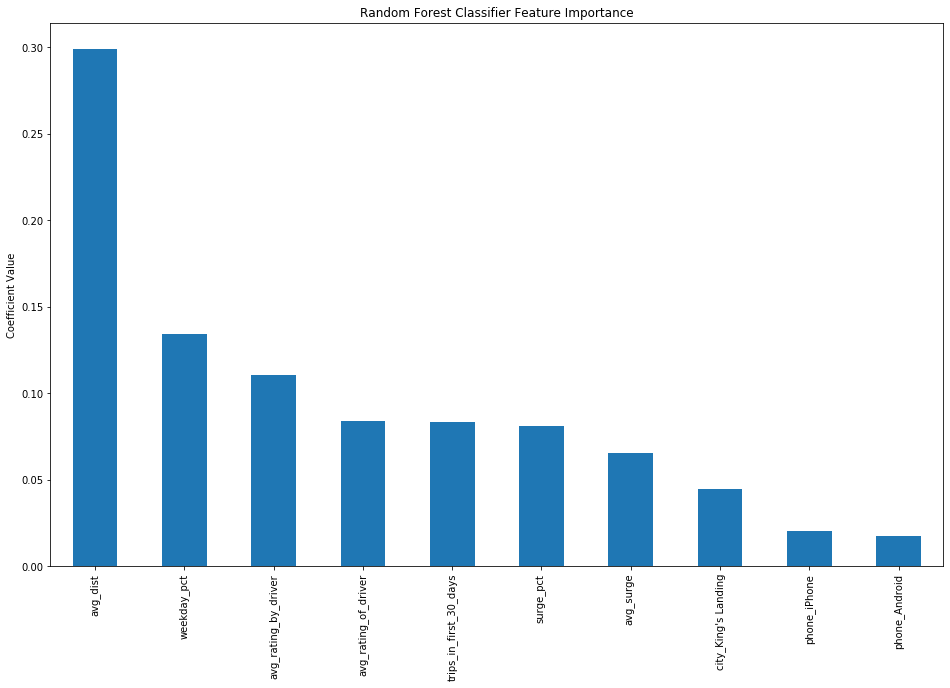

In [49]:
#Plot the results
plt.figure(figsize=(16,10))
(feature_importance['Coefficient']).nlargest(10).plot(kind='bar', x = feature_importance.index)
plt.title('Random Forest Classifier Feature Importance')
plt.ylabel('Coefficient Value')
plt.show()

Our most important features we discovered for keeping active users are avg_distance, weekday_pct, and avg_rating_by_driver.  Lets check to see if there is a statistical difference between an active and non active user

In [50]:
avg_dist_no_active = ultimate[ultimate['active_users'] == False]['avg_dist'].mean()
print('Mean avg_dist of non active users: {:.2f}'.format(avg_dist_no_active))
      
avg_dist_yes_active = ultimate[ultimate['active_users'] == True]['avg_dist'].mean()
print('Mean avg_dist of active users: {:.2f}'.format(avg_dist_yes_active))

Mean avg_dist of non active users: 6.21
Mean avg_dist of active users: 5.11


In [51]:
weekday_pct_no_active = ultimate[ultimate['active_users'] == False]['weekday_pct'].mean()
print('Mean weekday_pct of non active users: {:.2f}'.format(weekday_pct_no_active))
      
weekday_pct_yes_active = ultimate[ultimate['active_users'] == True]['weekday_pct'].mean()
print('Mean weekday_pct of active users: {:.2f}'.format(weekday_pct_yes_active))

Mean weekday_pct of non active users: 60.65
Mean weekday_pct of active users: 61.39


In [52]:
avg_rating_by_driver_no_active = ultimate[ultimate['active_users'] == False]['avg_rating_by_driver'].mean()
print('Mean weekday_pct of non active users: {:.2f}'.format(avg_rating_by_driver_no_active))
      
avg_rating_by_driver_yes_active = ultimate[ultimate['active_users'] == True]['avg_rating_by_driver'].mean()
print('Mean weekday_pct of active users: {:.2f}'.format(avg_rating_by_driver_yes_active))

Mean weekday_pct of non active users: 4.79
Mean weekday_pct of active users: 4.76


Weekday_pct and avg_rating_by_driver are actually pretty close together which is surprising from our results of feature importance.  But we do see that trips that were shorter had a better chance of future use that if doing longer trips.  It seems that having short trips is the best way to create more active users out of all the possible features from the data.